In [16]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions.utils import load_json, load_logs_from_json
from classes.GeneticA import GeneticCharacteristics, GeneticAlgorithm
from classes.GridSearch import GridSearch



## Запускаем GridSearch ##

In [ ]:
initial_conditions = load_json("test_conditions/initial_conditions_10_50.json")
    # Пример использования GridSearch
grid_search = GridSearch(
    task_conditions=initial_conditions,  # Используем первый набор условий
    param_grid={
        'max_iterations': [10000],
        'epsilon': [0],
        'population_size': [50],
        'max_attempts': [1000],
        'size_to_generate': [100, 200],
        'desired_population_size': [50, 100],
        'change_to_mutation': [0.1],
        'tournament_size': [5, 10]
    }
)
best_params = grid_search.find_best_parameters(filename="./results/best_params.json")
grid_search.save_logs_to_file(filename="./results/logs.json")

Evaluating combination: {'max_iterations': 10000, 'epsilon': 0, 'population_size': 50, 'max_attempts': 1000, 'size_to_generate': 100, 'desired_population_size': 50, 'change_to_mutation': 0.1, 'tournament_size': 5}
Best score: 58.25804665451803, Cur score: 58.25804665451803
Логи сохранены в файл: ./results/logs.json


In [21]:
load_logs_from_json("./results/logs.json").sort_values(by='final_optimization_score')

Успешно загружено 1 записей из ./results/logs.json


,max_iterations,epsilon,population_size,max_attempts,size_to_generate,desired_population_size,change_to_mutation,tournament_size,final_optimization_score,test case 1,...,test case 3,test case 4,test case 5,test case 6,test case 7,test case 8,test case 9,test case 10,ga_time,dp_time
0,10000,0,50,1000,100,50,0.1,5,58.258047,5,...,0,12,0,0,32,6,28,15,54.0719,0.005059


## По лучшей конфигурации считаем значения ##


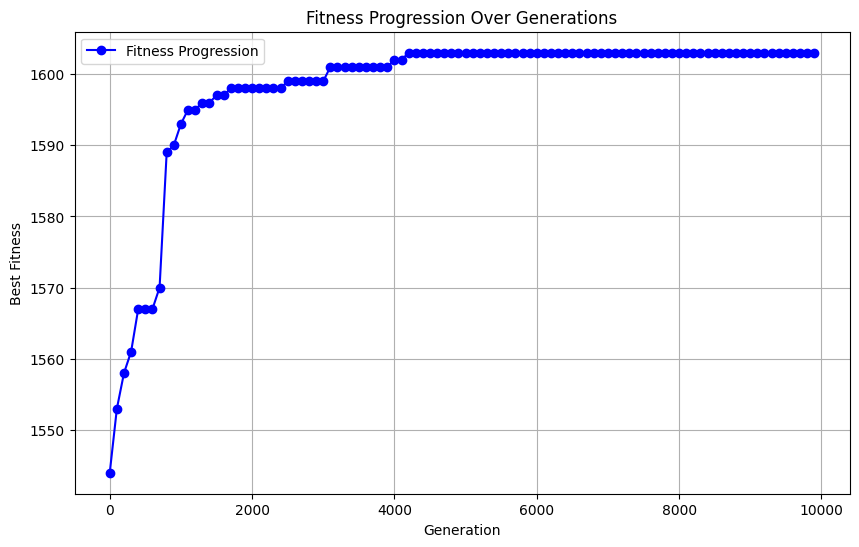

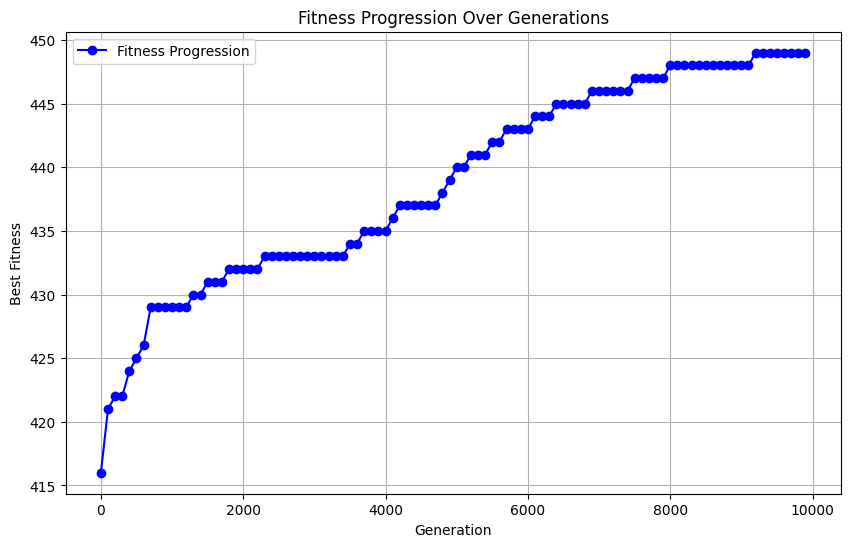

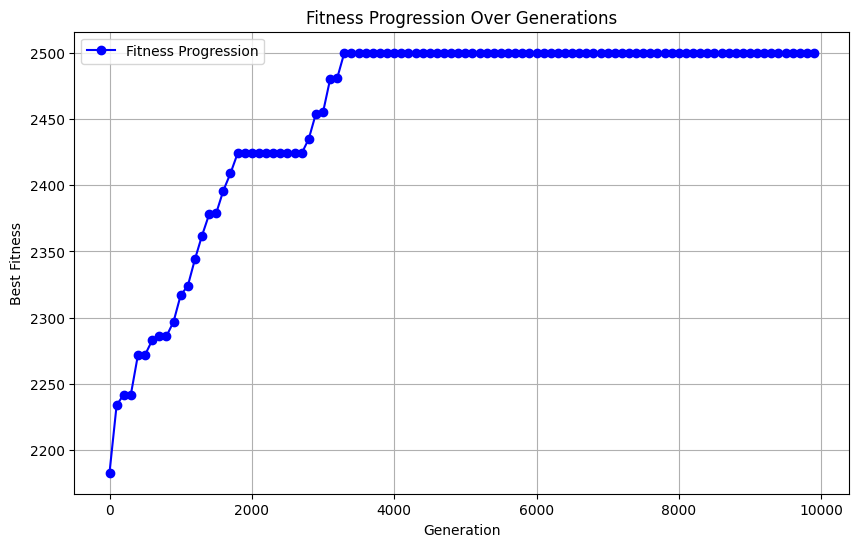

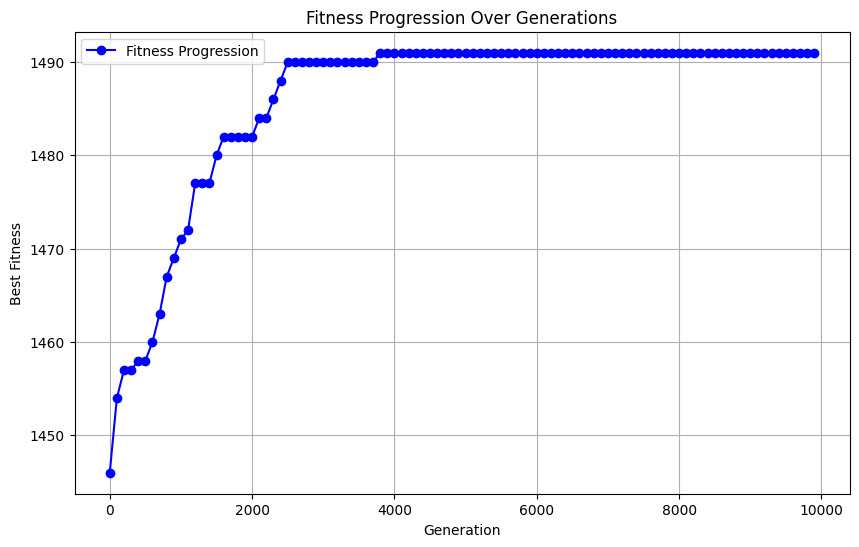

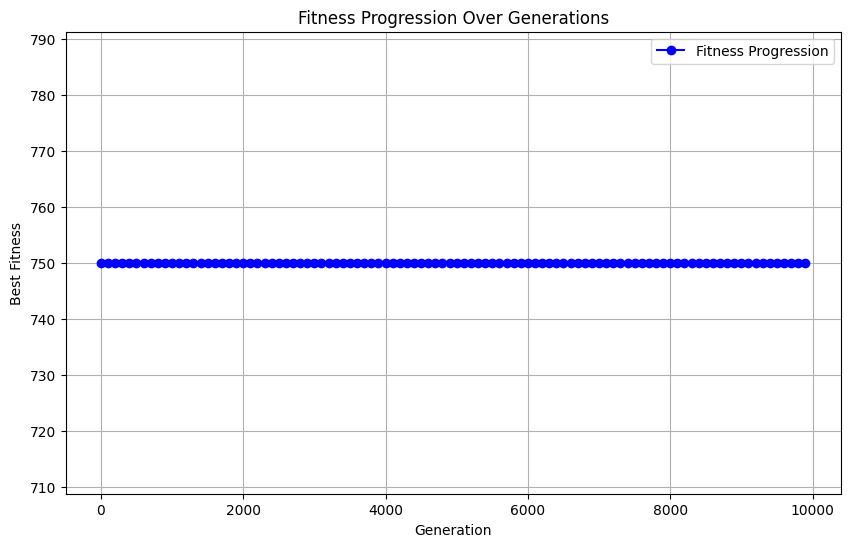

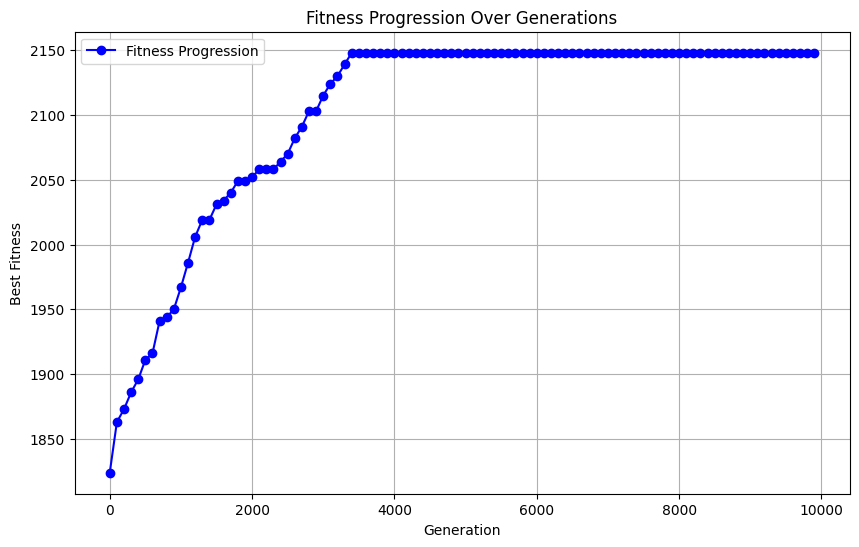

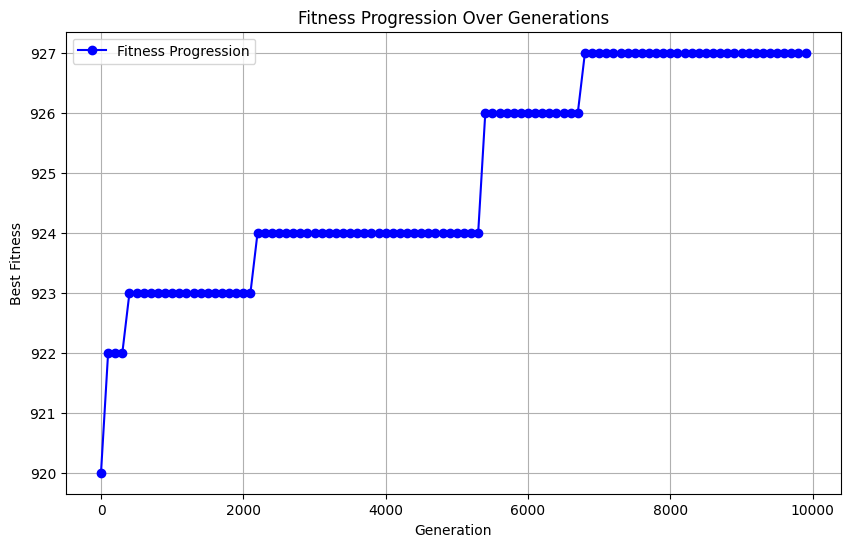

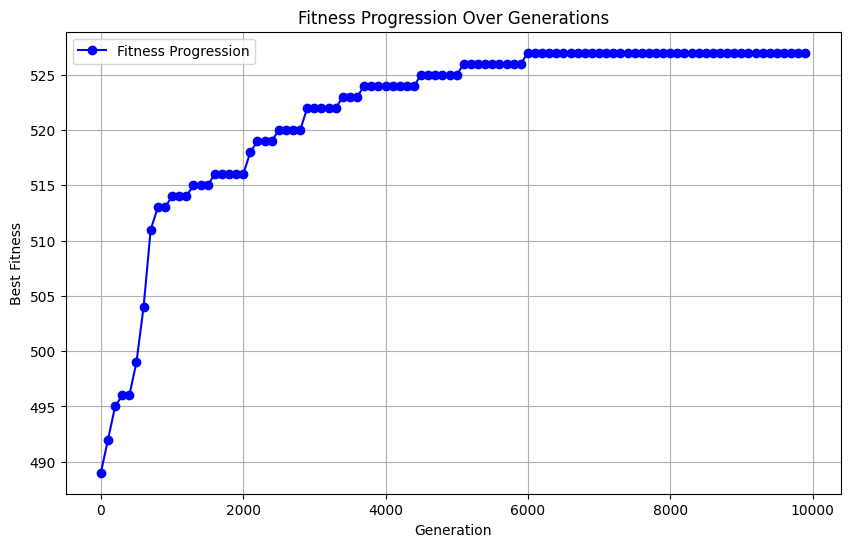

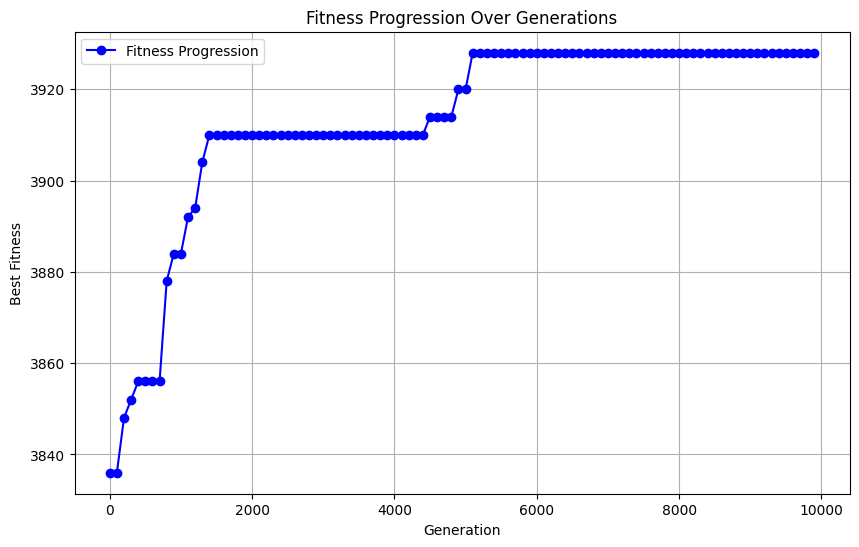

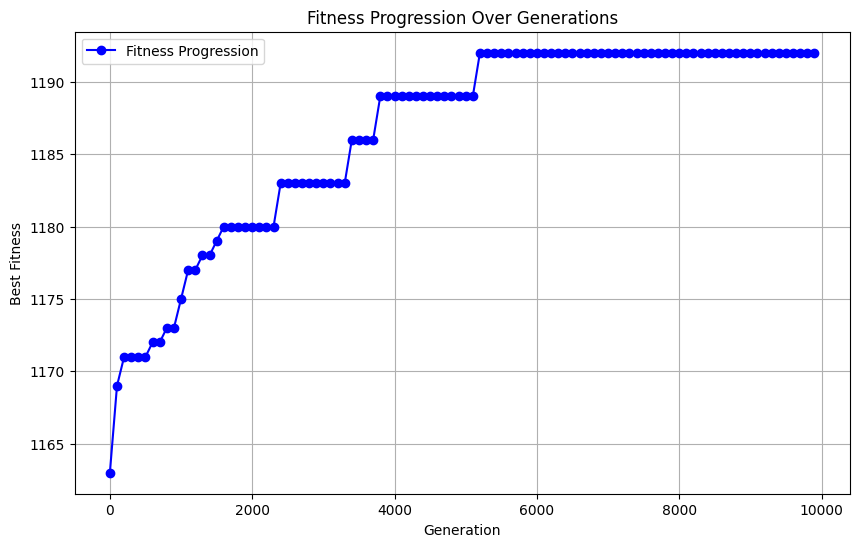

In [ ]:
initial_conditions = load_json("test_conditions/initial_conditions_2.json")
best_params = load_json("results/best_params.json")

for condition in initial_conditions:

    genetic_characteristics = GeneticCharacteristics(
        population_size=best_params['population_size'],
        min_vals=condition['min_vals'],
        weights=condition['weights'],
        costs=condition['costs'],
        max_weight=condition['max_weight'],
        max_iterations=best_params['max_iterations'],
        epsilon=best_params['epsilon'],
        max_attempts=best_params['max_attempts'],
        size_to_generate=best_params['size_to_generate'],
        change_to_mutation=best_params['change_to_mutation'],
        tournament_size=best_params['tournament_size'],
        desired_population_size=best_params['desired_population_size']
    )
    
    genetic_algorithm = GeneticAlgorithm(genetic_characteristics)
    
    result_fitness_ga, result_ga = genetic_algorithm.start_algorithm(show_progression_type='plot')
    
    